## **Contributions**

Sam: Presented slides, worked on adversarial testing

Matt: Most of the slides and did sklearn feature selection

Adrienne: Prepared data, performed cross-validation testing, tested models on new dataset, performed feature selection using logistic regression weights.

Jackson: Refined some of the slides. Assisted with perceptron and logistic regression on original data set. Also helped with getting weights from logistic regression on original data set. Presented some of the slides

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
# upload dataset
# allows you to select a folder from your local drive
from google.colab import files
uploaded = files.upload()

# **Preparing the Data**

In [ ]:
# read in dataset
column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
                'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
                'gill-color', 'stalk-shape', 'stalk-root',
                'stalk-surface-above-ring', 'stalk-surface-below-ring',
                'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
                'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
                'population', 'habitat']
df = pd.read_csv(r'agaricus-lepiota.data', names=column_names)
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
count = 0
# see how many unique values there are in each column
for i in range(len(column_names)):
  n = len(pd.unique(df[column_names[i]]))
  count += (n - 1)
  print(f"{column_names[i]}: {n}")

print(f"The final number of columns should be: {count}")

class: 2
cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7
The final number of columns should be: 96


In [ ]:
# this is a much more concise way of creating dummy columns
# set drop_first to true so that it drops a dummy column for each original attribute to prevent dummy variable trap
df_binary = pd.get_dummies(df, columns=df.columns, drop_first=True)
print(df_binary)

      class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           1            0            0            0            0   
1           0            0            0            0            0   
2           0            0            0            0            0   
3           1            0            0            0            0   
4           0            0            0            0            0   
...       ...          ...          ...          ...          ...   
8119        0            0            0            1            0   
8120        0            0            0            0            0   
8121        0            0            1            0            0   
8122        1            0            0            1            0   
8123        0            0            0            0            0   

      cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  \
0               1              0              1              0            0   
1            

In [ ]:
# make numpy array
mushroom_data = df_binary.values

# split array into labels and features
X, y = mushroom_data[:, 1:], mushroom_data[:, 0]

# separate data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2,
                                random_state=123)

# **Train and Test Models**

## **Perceptron**

Perceptron has accuracy of:  1.0


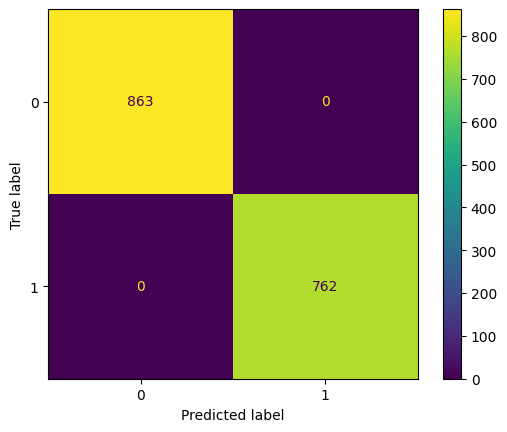

In [ ]:
#create perceptron model
p = Perceptron(max_iter=1000, tol=1e-3)
# train model
p.fit(X_train, y_train)

# test model
y_pred = p.predict(X_test)
print("Perceptron has accuracy of: ", p.score(X_test, y_test))
# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## **Logistic Regression**

Logistic regression classifier has accuracy of:  1.0


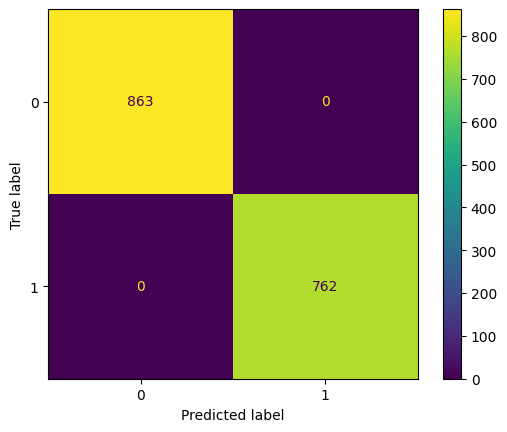

In [ ]:
# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(X_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(X_test, y_test))

# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## **Naive Bayes**

Bernoulli Naive Bayes classifier has accuracy of:  0.9353846153846154


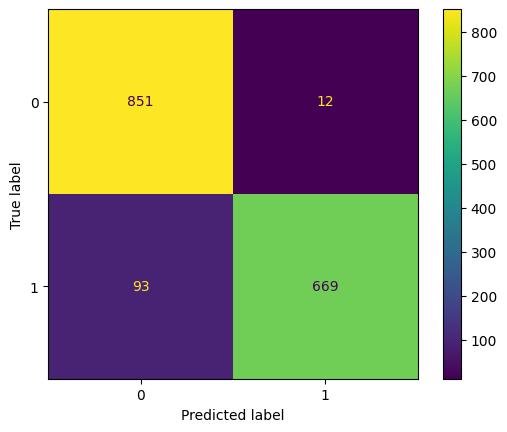

In [ ]:
# first try a Bernoulli Naive Bayes since all features are binary
b = BernoulliNB()
b.fit(X_train, y_train)
y_pred = b.predict(X_test)

# Getting the accuracy score of predictive model
print("Bernoulli Naive Bayes classifier has accuracy of: ", b.score(X_test, y_test))

# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Gaussian Naive Bayes classifier has accuracy of:  0.9452307692307692


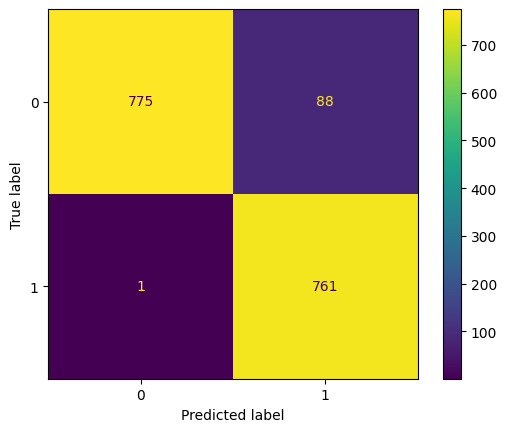

In [ ]:
# Bernoulli Naive Bayes didn't perform as well as other models, so try Gaussian distribution
b_gauss = GaussianNB()
b_gauss.fit(X_train, y_train)
y_pred = b_gauss.predict(X_test)

# Getting the accuracy score of predictive model
print("Gaussian Naive Bayes classifier has accuracy of: ", b_gauss.score(X_test, y_test))

# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


The Gaussian model doesn't score much better than the Bernoulli model for accuracy, but the confusion matrix shows that it is to be preferred.  It only classified 1 poisonous mushroom as edible, as opposed to the Bernoulli model which classified 93 poisonous mushrooms as edible.  Predicting an edible mushroom as poisonous simply means that the user doesn't get to eat a mushroom, but the consequences of predicting a poisonous mushroom as edible could be deadly.  Therefore, any model with a low false negative rate is to be preferred over a model with a high false negative rate, regardless of overall accuracy.

# **Testing Overfitting**
Since two of the models achieved 100% accuracy on the test set, we need to check if they are overfitted.

## **10-Fold Cross Validation**
First, we'll try k-fold cross validation which uses a different, non-overlapping subset of the training data for k epochs to test the model on after training on the remainder of the test data.  If the average of the accuracy scores on the validation sets is close to the results achieved above (100% accuracy), it is unlikely that the model is overfitting.  At the very least, it means that the training data samples are all similar enough that testing on a random subset of them won't affect the accuracy.

**Perceptron**

In [ ]:
p_cv = Perceptron(max_iter=1000, tol=1e-3)
p_cv_scores = cross_val_score(p_cv, X_test, y_test, cv=10)
print(f"Validation scores for 10 epochs: {p_cv_scores}")
print(f"Average validation accuracy score: {sum(p_cv_scores)/len(p_cv_scores)}")

Validation scores for 10 epochs: [0.98773006 0.99386503 0.99386503 1.         0.99386503 1.
 1.         1.         0.99382716 1.        ]
Average validation accuracy score: 0.9963152313868061


**Logistic Regression**

In [ ]:
logreg_cv = LogisticRegression()
logreg_cv_scores = cross_val_score(logreg_cv, X_test, y_test, cv=10)
print(f"Validation scores for 10 epochs: {logreg_cv_scores}")
print(f"Average validation accuracy score: {sum(logreg_cv_scores)/len(logreg_cv_scores)}")

Validation scores for 10 epochs: [1.         0.99386503 0.99386503 1.         1.         1.
 1.         1.         0.98765432 1.        ]
Average validation accuracy score: 0.9975384382337348


## **Test Models on Another Dataset**
This is another simulated dataset, with values taken from the book Mushrooms and Toadstools by Patrick Harding.  It has 61069 samples, representing 153 species.  It doesn't specify what families the mushrooms are in, so if the models don't perform well on this dataset, it could be because of that.  Also, the features don't perfectly align with the features in the original dataset (some features are missing and it has some additional features).

In [ ]:
# upload dataset
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
# read in dataset
df2 = pd.read_csv(r'data.csv', sep=';')

# drop columns that aren't in the original dataset
df2 = df2.drop([col for col in df2.columns if col not in df.columns and col in df2.columns], axis=1)

# convert categorical data into binary
# don't drop first column because it will get dropped later
df2_binary = pd.get_dummies(df2, columns=df2.columns, drop_first=False)

# drop columns that aren't in the original dataset
df2_binary = df2_binary.drop([col for col in df2_binary.columns if col not in df_binary.columns and col in df2_binary.columns], axis=1)

# insert columns that are in original dataset, but not in this one
# fill them with NaN
index = 0
count = 0
for col in df_binary:
  if col not in df2_binary:
    df2_binary.insert(index, col, np.nan)
    count += 1
  index += 1

print("Number of columns added: ", count)
print(df2_binary)

Number of columns added:  53
       class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            1            0            0          NaN            0   
1            1            0            0          NaN            0   
2            1            0            0          NaN            0   
3            1            0            1          NaN            0   
4            1            0            0          NaN            0   
...        ...          ...          ...          ...          ...   
61064        1            0            0          NaN            1   
61065        1            0            1          NaN            0   
61066        1            0            0          NaN            1   
61067        1            0            1          NaN            0   
61068        1            0            0          NaN            1   

       cap-shape_x  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  \
0                1              1              0  

In [ ]:
# make numpy array
mushroom_data_2 = df2_binary.values

# split array into labels and features
X2, y2 = mushroom_data_2[:, 1:], mushroom_data_2[:, 0]

(61069, 95)


In [ ]:
# fill NaN values using scikit's iterative imputer
# unfortunately, this needs to train on the original dataset in order to fill columns that are completely empty
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(X)
X2 = imp.transform(X2)

**Test it on Perceptron**

Perceptron has accuracy of:  0.4364079975110121


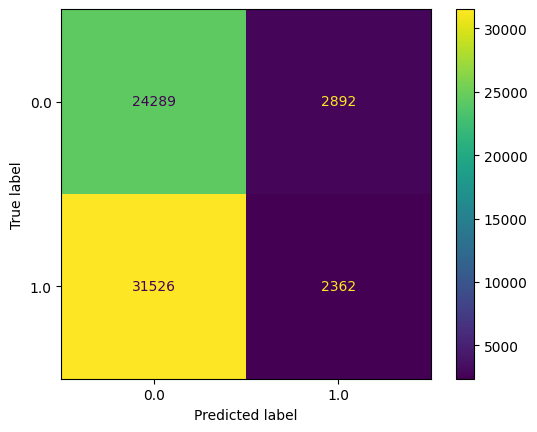

In [ ]:
# test model
y_pred = p.predict(X2)
print("Perceptron has accuracy of: ", p.score(X2, y2))
# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y2, y_pred)
plt.show()

**Test it on Logsistic Model**

Logistic Model has accuracy of:  0.43721036859945306


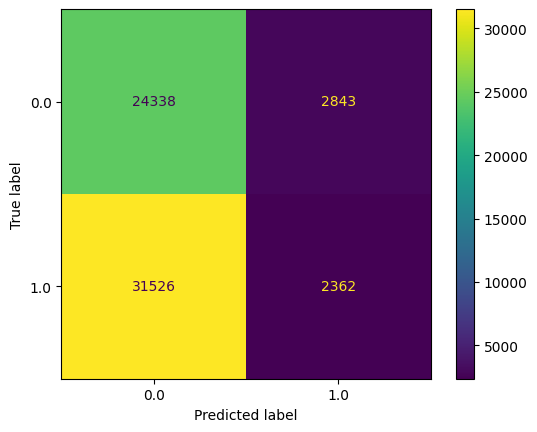

In [ ]:
# test model
y_pred = logreg.predict(X2)
print("Logistic Model has accuracy of: ", logreg.score(X2, y2))
# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y2, y_pred)
plt.show()

In [ ]:
# count how many of each class there are
poisonous = df2['class'].value_counts()['p']
edible = df2['class'].value_counts()['e']
print(f"Number of poisonous mushrooms: {poisonous}")
print(f"Number of edible mushrooms: {edible}")

Number of poisonous mushrooms: 33888
Number of edible mushrooms: 27181


**Results**

Both models overwhelmingly predict that a mushroom is edible (~91% of the time).  This is not great, especially given that there are more poisonous mushrooms than edible ones in this dataset--it's worse than a model that just always chooses poisonous for the class (this would give an accuracy score of 56%).  However, this is not necessarily significant since there were many missing values in this dataset that had to be inferred from the original.  Additionally, it's unknown what families these mushrooms belong to; the original dataset only had samples from the Agaricus and Lepiota families and it could be the case that other families of mushrooms would have completely different feature indicators of edibility.

# **Narrowing Down Features**
Since the perceptron and logistic regression models perform so well (at least on the original dataset), it seems likely not all of the features are necessary to build a classifier.  We will try narrow down the number of features to as few as possible while still maintaining the same accuracy.

## **Using Most Important Features from Logistic Regression**

### **With Initial Categorical Data**

In [ ]:
# function to drop columns from dataframe and follow all previous steps to get logistic regression model
# returns the y_test and y predictions so you can make a confusion matrix
def makeLogRegClassifier(oldData, names):
  temp_df = oldData.copy()
  temp_df.drop(labels=names, axis=1, inplace=True)

  temp_df_binary = pd.get_dummies(temp_df, columns=temp_df.columns, drop_first=True)

  # make numpy array
  temp_data = temp_df_binary.values

  # split array into labels and features
  X_temp, y_temp = temp_data[:, 1:], temp_data[:, 0]

  # separate data into training and testing groups
  X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(
                                  X_temp, y_temp,
                                  test_size=0.2,
                                  random_state=123)

  # Fitting logistic regression with default parameter values
  logreg_temp = LogisticRegression()
  logreg_temp.fit(X_temp_train, y_temp_train)

  # Using the trained model to predict instances from the test set
  y_temp_pred = logreg_temp.predict(X_temp_test)

  return(y_temp_test, y_temp_pred, logreg_temp.score(X_temp_test, y_temp_test))

In [ ]:
# find the weights greater than |1|
weights = logreg.coef_
count = 1
most_important = []
for weight in np.nditer(weights):
  if weight <= -1.1 or weight >= 1.1:
      most_important.append(count)
  count += 1

# get the names of the columns
index = 0
mvp_names = []
for col in df_binary:
  if index in most_important:
    name = col[:-2]
    if name not in mvp_names:
      mvp_names.append(name)
  index += 1

print(mvp_names)
print("Number of features to keep: ", len(mvp_names))

['cap-color', 'odor', 'gill-spacing', 'gill-size', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'ring-type', 'spore-print-color', 'population', 'habitat']
Number of features to keep:  12


In [ ]:
# get columns to drop
drop_names = []
for col in df:
  if col not in mvp_names and col != 'class':
    drop_names.append(col)
print(drop_names)
print("Number of features to drop: ", len(drop_names))

['cap-shape', 'cap-surface', 'bruises', 'gill-attachment', 'gill-color', 'stalk-shape', 'stalk-color-above-ring', 'veil-type', 'veil-color', 'ring-number']
Number of features to drop:  10


Logistic regression classifier has accuracy of:  1.0


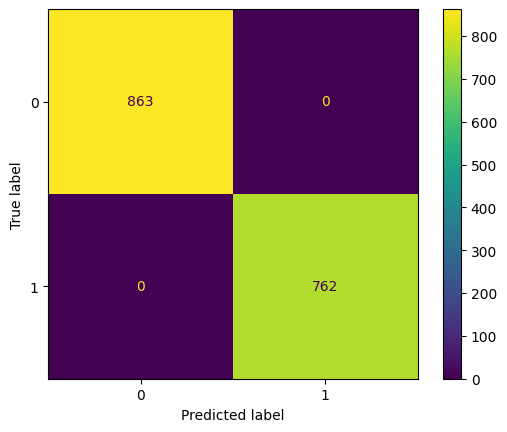

In [ ]:
y_new_test, y_new_pred, score = makeLogRegClassifier(df, drop_names)

print("Logistic regression classifier has accuracy of: ", score)

# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_new_test, y_new_pred)
plt.show()

Just by looking at the weights from the original logistic regression model, we managed to discard 10 features while retaining the same accuracy.

In [ ]:
import copy
# drop one of the remaining features at a time
# put column names that don't effect accuracy in a list
no_change_names = []
for name in mvp_names:
  print(f"Dropping feature: {name}")
  new_names = copy.copy(drop_names)
  new_names.append(name)
  ytest, ypred, score = makeLogRegClassifier(df, new_names)
  if score == 1.0:
    no_change_names.append(name)
  print("Logistic regression classifier has accuracy of: ", score, "\n")
print("Columns that don't affect the accuracy score: ", no_change_names)

Dropping feature: cap-color
Logistic regression classifier has accuracy of:  1.0 

Dropping feature: odor
Logistic regression classifier has accuracy of:  0.9901538461538462 

Dropping feature: gill-spacing
Logistic regression classifier has accuracy of:  1.0 

Dropping feature: gill-size
Logistic regression classifier has accuracy of:  0.9987692307692307 

Dropping feature: stalk-root
Logistic regression classifier has accuracy of:  0.9987692307692307 

Dropping feature: stalk-surface-above-ring
Logistic regression classifier has accuracy of:  1.0 

Dropping feature: stalk-surface-below-ring
Logistic regression classifier has accuracy of:  1.0 

Dropping feature: stalk-color-below-ring
Logistic regression classifier has accuracy of:  1.0 

Dropping feature: ring-type
Logistic regression classifier has accuracy of:  1.0 

Dropping feature: spore-print-color
Logistic regression classifier has accuracy of:  1.0 

Dropping feature: population
Logistic regression classifier has accuracy of

Additionally dropping cap color, gill spacing, stalk shape, stalk surface above ring, stalk surface below ring, stalk color below ring, ring type, and spore print color on their own had no effect on accuracy.  (This equates to getting rid of 37 binary features.)

What if we drop all of them?

Logistic regression classifier has accuracy of:  0.9864615384615385


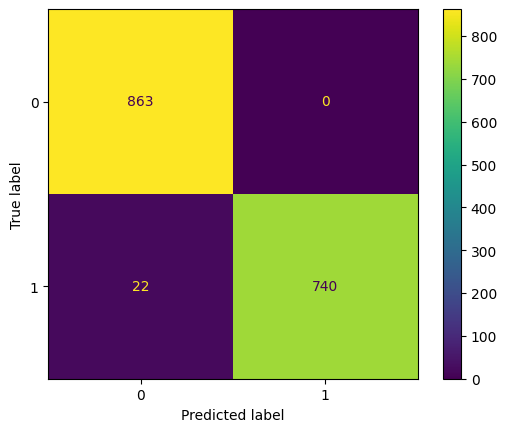

In [ ]:
temp_names = copy.copy(drop_names)
more_names = temp_names + no_change_names
ytest, ypred, score = makeLogRegClassifier(df, more_names)
print("Logistic regression classifier has accuracy of: ", score)
# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(ytest, ypred)
plt.show()

Not ideal; it's only wrong in classifying a few mushrooms as edible that are actually poisonous, but this is the wrong way to be wrong!

### **With Binary Data**

In [ ]:
# find the weights greater than |1|
weights = logreg.coef_
count = 1
most_important = []
for weight in np.nditer(weights):
  if weight <= -1.1 or weight >= 1.1:
      most_important.append(count)
  count += 1

# get the names of the columns
index = 0
mvp_names_b = []
for col in df_binary:
  if index in most_important:
    if col not in mvp_names_b:
      mvp_names_b.append(col)
  index += 1

print(mvp_names_b)
print("Number of binary features to keep: ", len(mvp_names_b))

['cap-color_c', 'odor_c', 'odor_f', 'odor_l', 'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-spacing_w', 'gill-size_n', 'stalk-root_b', 'stalk-root_c', 'stalk-root_r', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_y', 'stalk-color-below-ring_n', 'ring-type_f', 'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_r', 'spore-print-color_u', 'population_c', 'population_y', 'habitat_w']
Number of binary features to keep:  24


In [ ]:
# get columns to drop
drop_names_b = []
for col in df_binary:
  if col not in mvp_names_b and col != 'class_p':
    drop_names_b.append(col)
print(drop_names_b)
print("Number of features to drop: ", len(drop_names_b))

['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_t', 'odor_m', 'gill-attachment_f', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_e', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 'stalk-color-above-ring_c', 'stalk-color-above-ring_e', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_o', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-above-ring_y', 'stalk-color-below-ring_c', 'stalk-color-below-ring_e', 'stalk-color-below-ring_g', 'stalk-color-below-ring_o', 'stalk-color-below-ring_p', 'stalk-color-bel

Logistic rergession accuracy score:  1.0


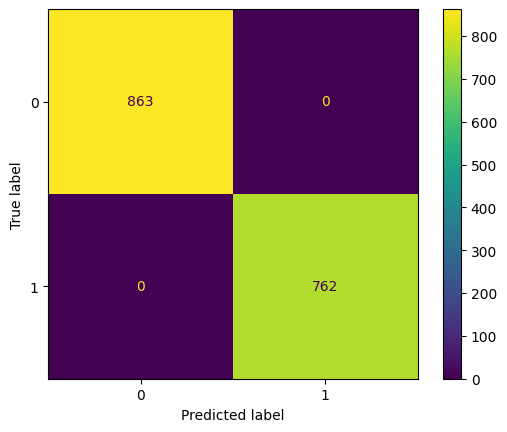

In [ ]:
df_b = df_binary.copy()
df_b.drop(labels=drop_names_b, axis=1, inplace=True)

# make numpy array
data_b = df_b.values

# split array into labels and features
X_b, y_b = data_b[:, 1:], data_b[:, 0]

# separate data into training and testing groups
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
                                X_b, y_b,
                                test_size=0.2,
                                random_state=123)

# Fitting logistic regression with default parameter values
logreg_b = LogisticRegression()
logreg_b.fit(X_train_b, y_train_b)

# Using the trained model to predict instances from the test set
y_pred_b = logreg_b.predict(X_test_b)

print("Logistic rergession accuracy score: ", logreg_b.score(X_test_b, y_test_b))
# Evaluate the confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test_b, y_pred_b)
plt.show()

## Sklearn Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel

# need baseline model to select from
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# feature selection
select_model_fs = SelectFromModel(logreg, prefit=True)
select_model_fs.fit(X_train, y_train)

# colums dropped
dropped_columns = []
num_dropped = 0
counter = 0
for x in select_model_fs.get_support():
  if x == False:
    num_dropped += 1
    dropped_columns.append(df_binary.columns[counter])
  counter += 1

print("Number of features dropped: ", num_dropped)
print("Dropped columns: ", dropped_columns)

# new model with feature selection
new_x = select_model_fs.transform(X_train)
logreg_fs = LogisticRegression()
logreg_fs.fit(new_x, y_train)

print("Logistic regression classifier has accuracy of: ", logreg_fs.score(new_x, y_train))

Number of features dropped:  65
Dropped columns:  ['class_p', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-surface_g', 'cap-surface_s', 'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'odor_l', 'odor_y', 'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'stalk-root_c', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_c', 'stalk-color-above-ring_e', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_o', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-above-ring_y', 'stalk-color-below-ring_c', 'stalk-color-below-ring_e', 'stalk-color-below-ring_n', 'stalk-color-below-ring_o', 'stalk-color